In [62]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = 16,8

from numpy import *
from numpy.linalg import multi_dot

In [63]:
symbols = ['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX']
numofasset = len(symbols)
numofportfolio= 5000

In [64]:
all_stocks = yf.download(symbols, start='2015-01-01', end='2021-07-22', progress=False)['Adj Close']
all_stocks.tail()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2021-07-15,148.041809,3631.199951,344.459991,2625.330078,542.950012
2021-07-16,145.957977,3573.629883,341.160004,2636.909912,530.309998
2021-07-19,142.029602,3549.590088,336.950012,2585.080078,532.280029
2021-07-20,145.718674,3573.189941,341.660004,2622.030029,531.049988
2021-07-21,144.970901,3585.199951,346.230011,2652.010010,513.630005


In [65]:
all_stocks.to_csv('all_stocks.csv')

In [66]:
df = pd.read_csv('all_stocks.csv', index_col=0, parse_dates=True)
df.head(5)

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2015-01-02,24.745993,308.519989,78.449997,523.373108,49.848572
2015-01-05,24.048864,302.190002,77.190002,512.463013,47.311428
2015-01-06,24.051123,295.290009,76.150002,500.585632,46.501431
2015-01-07,24.388374,298.420013,76.150002,499.727997,46.742859
2015-01-08,25.325426,300.459991,78.180000,501.303680,47.779999


In [67]:
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
AAPL,1649.0,53.455946,33.687448,21.036303,28.238455,41.486176,63.815430,148.709824
AMZN,1649.0,1537.015657,925.673847,286.950012,757.770020,1512.290039,1908.989990,3731.409912
FB,1649.0,170.306270,63.583010,74.050003,119.870003,167.679993,196.809998,355.640015
GOOG,1649.0,1110.850512,454.284514,491.201416,767.039978,1060.619995,1263.209961,2652.010010
NFLX,1649.0,265.913408,152.497783,45.547142,115.809998,275.299988,368.149994,586.340027


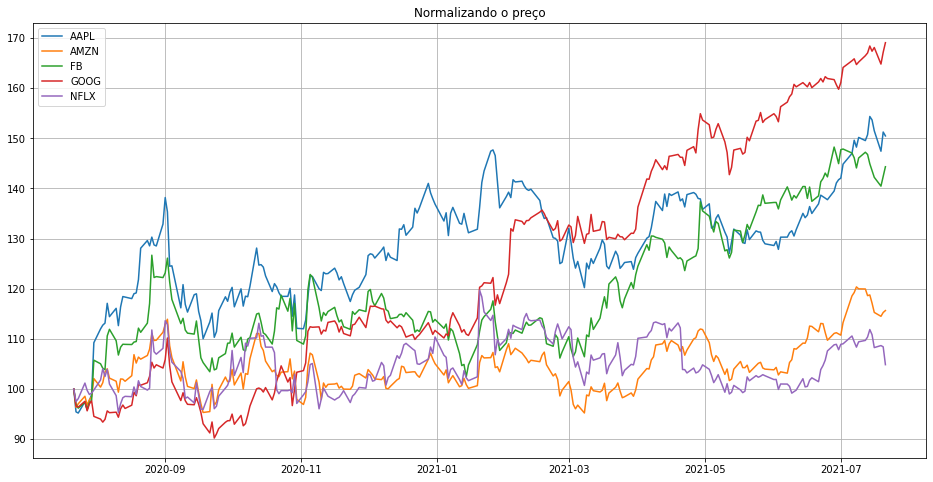

In [68]:
fig = plt.figure(figsize=(16, 8))
ax = plt.axes()
ax.set_title('Normalizando o preço')
ax.plot(df[-252:]/df.iloc[-252]*100)
ax.legend(df.columns, loc='upper left')
ax.grid(True)

In [69]:
returns = df.pct_change().fillna(0)
returns.head()


,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2015-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-05,-0.028171,-0.020517,-0.016061,-0.020846,-0.050897
2015-01-06,0.000094,-0.022833,-0.013473,-0.023177,-0.017121
2015-01-07,0.014022,0.010600,0.000000,-0.001713,0.005192
2015-01-08,0.038422,0.006836,0.026658,0.003153,0.022188


In [70]:
annual_returns = (returns.mean() * 252)
annual_returns


AAPL    0.313659
AMZN    0.420956
FB      0.277351
GOOG    0.283826
NFLX    0.443783
dtype: float64

Text(0.5, 1.0, 'Retorno anual (in %)')

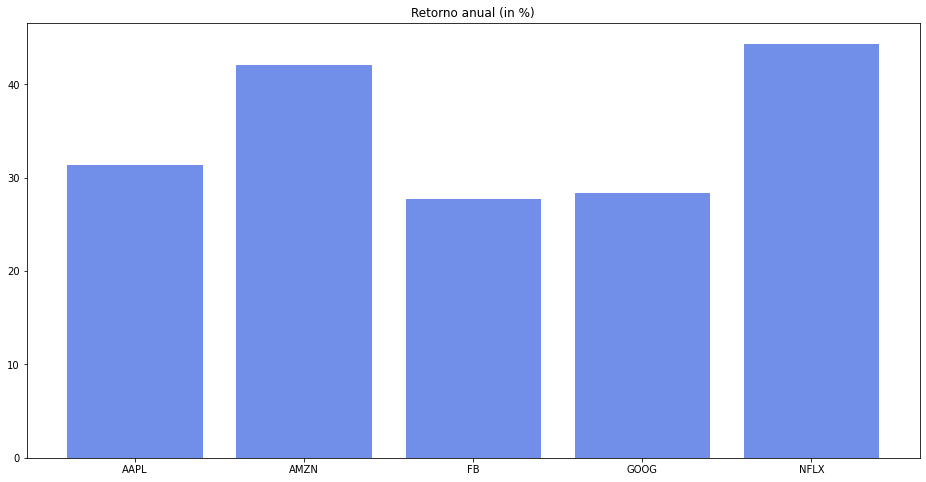

In [71]:
fig = plt.figure()
ax = plt.axes()

ax.bar(annual_returns.index, annual_returns*100, color='royalblue', alpha=0.75)
ax.set_title('Retorno anual (in %)')


In [72]:
vols = returns.std()
vols

AAPL    0.018543
AMZN    0.019172
FB      0.019943
GOOG    0.016885
NFLX    0.026455
dtype: float64

In [73]:
annual_vols = vols*sqrt(252)
annual_vols

AAPL    0.294356
AMZN    0.304340
FB      0.316592
GOOG    0.268033
NFLX    0.419954
dtype: float64

Text(0.5, 1.0, 'Volatilidade durante o ano (in %)')

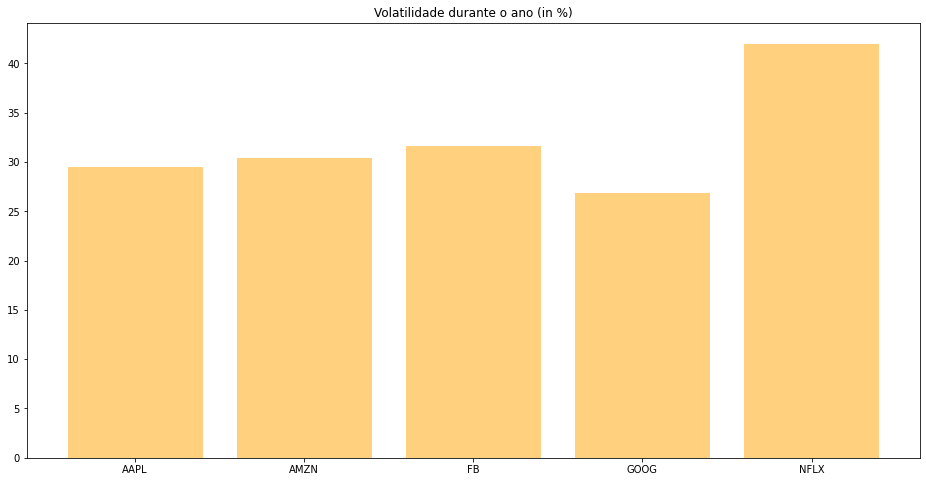

In [74]:
fig = plt.figure()
ax = plt.axes()

ax.bar(annual_vols.index, annual_vols*100, color='orange', alpha=0.5)
ax.set_title('Volatilidade durante o ano (in %)')


#### Suponha que um portfólio composto por todas as cinco ações com peso igual. Vamos agora calcular as estatísticas do portfólio

In [75]:
wts = numofasset * [1./numofasset]
array(wts).shape 

(5,)

In [76]:
wts = numofasset *[1./numofasset]
wts = array(wts)[:,newaxis]
wts

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [77]:
print(numofasset)

5


In [78]:
wts.shape

(5, 1)

In [79]:
#   return anual de cada carteira   # 
ret = array(returns.mean() * 252)[:,newaxis]
ret

array([[0.31365892],
       [0.42095605],
       [0.27735086],
       [0.28382553],
       [0.44378319]])

In [80]:
ret.shape

(5, 1)

In [81]:
#   retorno do portifoio    #
wts.T @ ret

array([[0.34791491]])

In [82]:
#   Covariancia #
cov = returns.cov()*252
cov 

,AAPL,AMZN,FB,GOOG,NFLX
AAPL,0.086646,0.050035,0.053710,0.047473,0.051414
AMZN,0.050035,0.092623,0.057754,0.052610,0.067641
FB,0.053710,0.057754,0.100231,0.056447,0.059243
GOOG,0.047473,0.052610,0.056447,0.071842,0.054014
NFLX,0.051414,0.067641,0.059243,0.054014,0.176361


In [83]:
#   Variancia do portifolio     #
var = multi_dot([wts.T, cov, wts])
var

array([[0.06513532]])

In [84]:
#   volatilidade do portifolio  #
sqrt(var)

array([[0.25521622]])

#### Vamos incluir as estatísticas principais em uma função que pode ser usada para exercícios de otimização.

In [106]:
def portfolio_stats(weights):
    weights = array(weights)[:,newaxis]
    port_rets = weights.T @ array(returns.mean() * 252)[:,newaxis]
    port_vols = sqrt(multi_dot([weights.T, returns.cov()*252, weights]))
    return np.array(port_rets, port_vols, port_rets/port_vols).flatten()

### Simulação de portifolio
Agora, implementaremos uma simulação de Monte Carlo para gerar pesos de portfólio aleatórios em uma escala maior e calcular o retorno esperado do portfólio, a variância e a proporção de sharpe para cada alocação simulada. Em seguida, identificaremos a carteira com maior retorno por unidade de risco.

In [107]:
w = random.random(numofasset)[:,newaxis]
w

array([[0.05154931],
       [0.02223094],
       [0.79569602],
       [0.58861125],
       [0.52717421]])

In [108]:
#   Defina os pesos de forma que a soma dos pesos seja igual a 1    #
w/=sum(w)
w


array([[0.025966  ],
       [0.01119799],
       [0.40080157],
       [0.2964905 ],
       [0.26554393]])

In [109]:
# Inicializa a lista
rets = []; vols = []; wts = []

# Simulação 5,000 portifolios
for i in range (5000):
    
    # Generate random pesos
    weights = random.random(numofasset)[:, newaxis]
    
    # Defina os pesos de forma que a soma dos pesos seja igual a 1 $
    weights /= sum(weights)
    
    # Estatistica do portifolio
    rets.append(weights.T @ array(returns.mean() * 252)[:, newaxis])        
    vols.append(sqrt(multi_dot([weights.T, returns.cov()*252, weights])))
    wts.append(weights.flatten())

# Valores #    
port_rets = array(rets).flatten()
port_vols = array(vols).flatten()
port_wts = array(wts)


In [110]:
#Criando o dataframe para analise
msrp_df = pd.DataFrame({'returns': port_rets,
                        'volatility': port_vols,
                        'sharpe_ratio': port_rets/port_vols,
                        'weights': list(port_wts)})
msrp_df.head()


,returns,volatility,sharpe_ratio,weights
0,0.344197,0.256469,1.342060,"[0.06805129181697211, 0.24539050000444768, 0.2..."
1,0.338048,0.253224,1.334978,"[0.16978382975524117, 0.27183363025090207, 0.2..."
2,0.322594,0.254495,1.267587,"[0.353016547849814, 0.19142930457709229, 0.338..."
3,0.369670,0.272372,1.357226,"[0.0052596852517563545, 0.24951514028307464, 0..."
4,0.342461,0.251470,1.361837,"[0.14387351230822046, 0.2131347419700256, 0.15..."


In [111]:
msrp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
returns,5000.0,0.348000,0.019828,0.283474,0.334995,0.347910,0.360996,0.413038
volatility,5000.0,0.261482,0.011257,0.244615,0.253440,0.259026,0.267071,0.346643
sharpe_ratio,5000.0,1.331154,0.057139,0.961776,1.294827,1.338735,1.372770,1.458413


In [112]:
# maximizando o shape ratio do portifolio
msrp = msrp_df.iloc[msrp_df['sharpe_ratio'].idxmax()]
msrp


returns                                                  0.391796
volatility                                               0.268645
sharpe_ratio                                             1.458413
weights         [0.2033760659963887, 0.5361610325319384, 0.043...
Name: 1291, dtype: object

In [113]:
max_sharpe_port_wts = msrp_df['weights'][msrp_df['sharpe_ratio'].idxmax()]

# alocação para atingir o portfólio de proporção máxima de sharpe
dict(zip(symbols, np.around(max_sharpe_port_wts*100, 2)))


{'AAPL': 20.34, 'AMZN': 53.62, 'FB': 4.38, 'GOOG': 3.74, 'NFLX': 17.92}

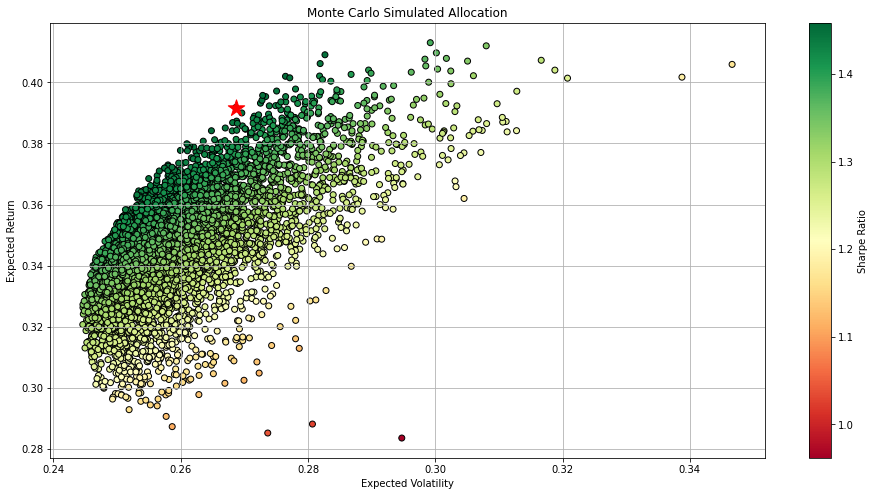

In [114]:
#Visualizando o portfólio simulado para risco e retorno
fig = plt.figure()
ax = plt.axes()

ax.set_title('Monte Carlo Simulated Allocation')

# simulação do portifolio
fig.colorbar(ax.scatter(port_vols, port_rets, c=port_rets / port_vols, 
                        marker='o', cmap='RdYlGn', edgecolors='black'), label='Sharpe Ratio') 

# maximizando o shape
ax.scatter(msrp['volatility'], msrp['returns'], c='red', marker='*', s = 300, label='Max Sharpe Ratio')

ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.grid(True)

## Fronteira de eficiencia
A Efficient Frontier é formada por um conjunto de carteiras que oferecem o maior retorno esperado da carteira para uma determinada volatilidade ou a menor volatilidade para um determinado nível de retornos esperados.

## Otimização restrita
A construção de carteiras ótimas é um problema de otimização restrito onde especificamos algumas condições de contorno e restrições. A função objetivo aqui é uma função que retorna o índice de sharpe máximo, a variância mínima (volatilidade) e as variáveis ​​de destino são os pesos da carteira. Usaremos a função minimizar do módulo de otimização scipy para atingir nosso objetivo.

In [115]:
import scipy.optimize as sco

In [128]:
def min_shape_ratio(weights):
    return portfolio_stats(weights)[2]

In [129]:
#Cada limite de ativo varia de 0 a 1
tuple((0, 1) for x in range(numofasset))

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [130]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(numofasset))
initial_wts = numofasset*[1./numofasset]

In [131]:
def min_variance(weights):
    return portfolio_stats(weights)[1]**2


In [ ]:
#   Otimizando para minimizar a variancia   #
opt_var = sco.minimize(min_variance,initial_wts,method='SLSQP', bounds=bnds,constraints=cons) 
#### ERROOORR ####